In [1]:
using TaylorSeries, TaylorIntegration, LinearAlgebra, Plots, Profile, BenchmarkTools

In [2]:
include("functions_dicke.jl");

# Integration

In this section, we integrate the differential system of equations in the article and compare this results with the article. 

In [3]:
### Stereographic projection

realβ(x, y) = x / (x^2 + y^2 + 1.0)
imagβ(x, y) = y / (x^2 + y^2 + 1.0)
γ(x, y) = 0.5 * (x^2 + y^2 - 1.0) / (x^2 + y^2 + 1.0)

x(β, γ) = - real(β) / (γ - 0.5)
y(β, γ) = - imag(β) / (γ - 0.5);x

x (generic function with 1 method)

In [4]:
### Initial conditions
ω = 1.0
ω₀ = 1.0
κ = 1.0
λ₋ = 1.0
λ₊ = 1.0
α0 = 0.001
β0 = 0.001
γ0 = 0.4999

0.4999

In [5]:
# Params
params = [ω, ω₀, κ, λ₋, λ₊];

In [6]:
# Initial
ξ_ini = [real(α0), imag(α0), x(β0, γ0), y(β0, γ0)];

In [7]:
### Integration
@time sol = taylorinteg(OpenDicke!, ξ_ini, 0.0, 100.0, 20, 1.e-20, params; maxsteps = 10000);

  2.889253 seconds (3.50 M allocations: 179.059 MiB, 2.61% gc time, 99.83% compilation time)


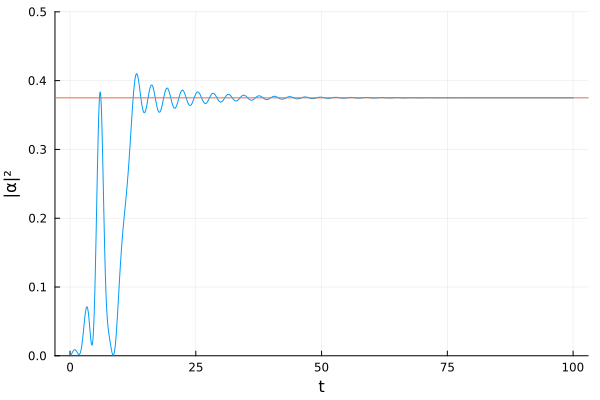

In [8]:
plot(sol.t, [i[1]^2 + i[2]^2 for i in eachrow(sol.x)], ylabel = "|α|²", 
    xlabel = "t", leg = false, ylims = (0.0, 0.5))
hline!([sol.x[end, 1]^2 + sol.x[end, 2]^2])

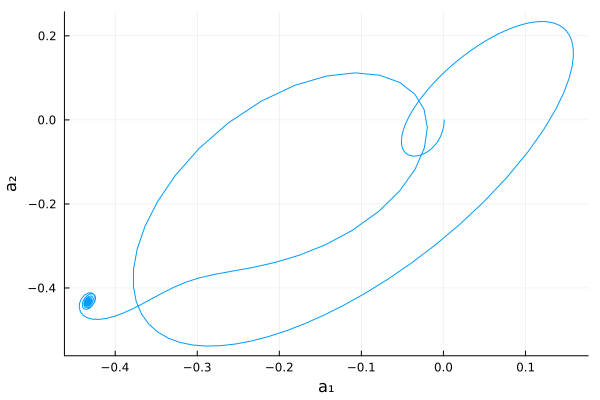

In [9]:
plot(sol.x[:, 1], sol.x[:, 2], ylabel = "a₂", 
    xlabel = "a₁", leg = false)

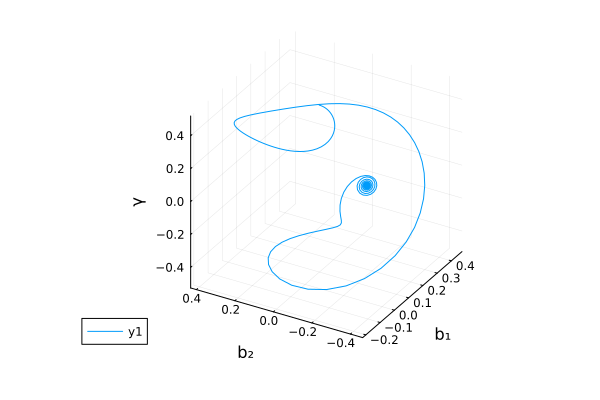

In [10]:
plot(imagβ.(sol.x[:, 3], sol.x[:, 4]), realβ.(sol.x[:, 3], sol.x[:, 4]),
     γ.(sol.x[:, 3], sol.x[:, 4]), ylabel = "b₁", xlabel = "b₂", zlabel = "γ",
     xflip=true)

In [11]:
include("../../src/Tesis.jl");

In [41]:
params = [1.0, 1.0, 1.0, 0.4]
pmin = 0.0
pmax = 4.0
Δs = 0.01
x_ini = [0.0, 0.0, 0.0, 0.0, 0.0]
tol = 1.e-13
ite = 10;

In [43]:
@time eqb1 = EquilibriaContinuation(OpenDicke1!, x_ini, params, pmin, pmax, Δs, 1000, tol, ite)

 ite = 1, ||F|| = 0.0004203220048322749
 ite = 2, ||F|| = 2.6095082887223403e-7
 ite = 3, ||F|| = 1.0377999889078526e-13
 ite = 4, ||F|| = 2.1416272881605274e-16
  0.043737 seconds (363.22 k allocations: 14.812 MiB)


 Equilibrium Branch
 # steps : 402
 # Limit Point Bifurcations : 0
 # Branch Point Bifurcations : 0
 # Hopf Point Bifurcations : 1


In [14]:
@time eqb2 = EquilibriaContinuation(OpenDicke1!, eqb1.bp[1], params, pmin, pmax, Δs, 1800, tol, ite)

 ite = 1, ||F|| = 4.524471906454397e-5
 ite = 2, ||F|| = 3.0082243976283326e-6
 ite = 3, ||F|| = 2.3898363106176572e-11
 ite = 4, ||F|| = 1.0248107461141911e-15
 ite = 1, ||F|| = 2.3414902185878206e-5
 ite = 2, ||F|| = 2.2617352769454334e-8
 ite = 3, ||F|| = 9.022150307313837e-15
 ite = 1, ||F|| = 2.5514195577890695e-5
 ite = 2, ||F|| = 1.6675619942525273e-7
 ite = 3, ||F|| = 1.672866099271066e-13
 ite = 4, ||F|| = 1.5630251541841462e-15
 ite = 1, ||F|| = 5.673876040490658e-5
 ite = 2, ||F|| = 5.013033063996264e-6
 ite = 3, ||F|| = 6.54381232194922e-11
 ite = 4, ||F|| = 7.607376399920527e-16
 ite = 1, ||F|| = 3.385790443577556e-5
 ite = 2, ||F|| = 1.5144175133213803e-6
 ite = 3, ||F|| = 6.2039379556799305e-12
 ite = 4, ||F|| = 1.3014733290201531e-15
 ite = 1, ||F|| = 2.173883594511143e-5
 ite = 2, ||F|| = 4.946622625179523e-7
 ite = 3, ||F|| = 1.6696065945396162e-13
 ite = 4, ||F|| = 2.1160913357077693e-15
  4.391930 seconds (7.78 M allocations: 330.865 MiB, 2.01% gc time, 93.16% compi

 Equilibrium Branch
 # steps : 1800
 # Limit Point Bifurcations : 6
 # Branch Point Bifurcations : 3
 # Hopf Point Bifurcations : 6


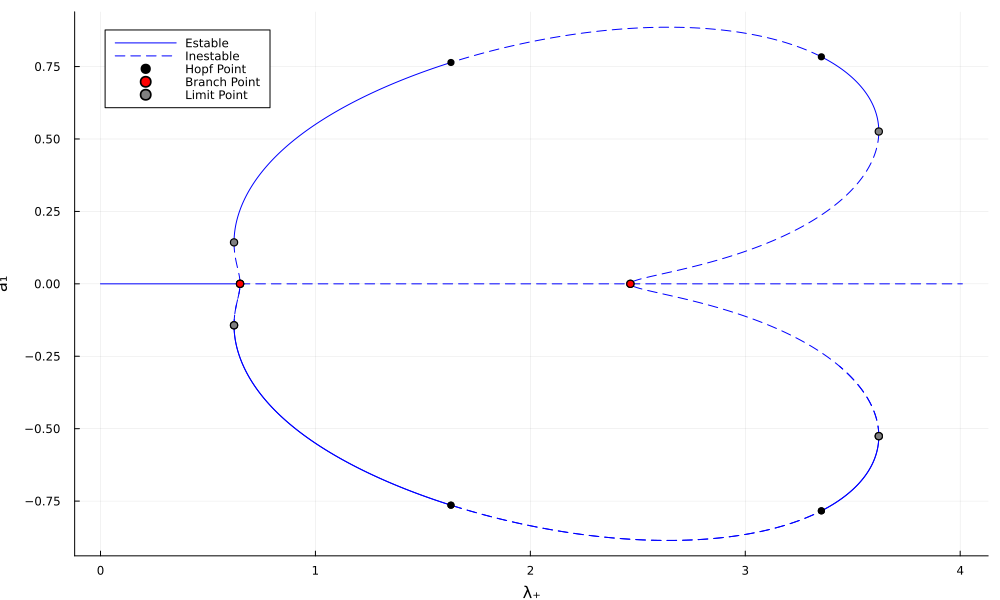

In [15]:
plot([eqb1.stbl[i] ? (eqb1.x[i, end], eqb1.x[i, 1]) : (NaN, NaN) for i in eachindex(eqb1.stbl)], label = "Estable",
     color = "blue", linestyle = :solid, ylabel = "a₁", xlabel = "λ₊", size = (1000, 600))
plot!([eqb1.stbl[i] ? (NaN, NaN) : (eqb1.x[i, end], eqb1.x[i, 1])  for i in eachindex(eqb1.stbl)], label = "Inestable",
     color = "blue", linestyle = :dash)
plot!([eqb2.stbl[i] ? (eqb2.x[i, end], eqb2.x[i, 1]) : (NaN, NaN) for i in eachindex(eqb2.stbl)], label = "",
     color = "blue", linestyle = :solid, ylabel = "a₁", xlabel = "λ₊", size = (1000, 600))
plot!([eqb2.stbl[i] ? (NaN, NaN) : (eqb2.x[i, end], eqb2.x[i, 1])  for i in eachindex(eqb2.stbl)], label = "",
     color = "blue", linestyle = :dash)
scatter!([NaN], [NaN], color="black", label="Hopf Point")
scatter!([NaN], [NaN], color="red", label="Branch Point")
scatter!([NaN], [NaN], color="gray", label="Limit Point")
for hp in eqb1.hp
    scatter!((hp.x[end], hp.x[1]), color = "black", label = "")
end
for lp in eqb1.lp
    scatter!((lp.x[end], lp.x[1]), color = "gray", label = "")
end
for bp in eqb1.bp
    scatter!((bp.x[end], bp.x[1]), color = "red", label = "")
end
for hp in eqb2.hp
    scatter!((hp.x[end], hp.x[1]), color = "black", label = "")
end
for lp in eqb2.lp
    scatter!((lp.x[end], lp.x[1]), color = "gray", label = "")
end
for bp in eqb2.bp
    scatter!((bp.x[end], bp.x[1]), color = "red", label = "")
end
plot!()

In [44]:
include("../../src/Tesis.jl");

In [17]:
include("functions_dicke.jl");

In [45]:
params1 = [1.0, 1.0, 1.0]
pmin = [0.0, 0.0]
pmax = [5.0, 5.0]
maxsteps = 10000
tol = 1.e-12
ite = 20;

In [19]:
lp1 = LimitPoint([eqb2.lp[1].x ; params[4]], eqb2.lp[1].vector, eqb2.lp[1].value)
lp2 = LimitPoint([eqb2.lp[2].x ; params[4]], eqb2.lp[2].vector, eqb2.lp[2].value);

In [20]:
bp1 = BranchPoint([eqb1.bp[1].x ; params[4]], eqb1.bp[1].vector, eqb1.bp[1].value, [eqb1.bp[1].dir; 0.0]);
bp2 = BranchPoint([eqb1.bp[2].x ; params[4]], eqb1.bp[2].vector, eqb1.bp[2].value, [eqb1.bp[2].dir; 0.0]);

In [21]:
hp1 = HopfPoint([eqb2.hp[1].x ; params[4]], eqb2.hp[1].vector, eqb2.hp[1].value)
hp2 = HopfPoint([eqb2.hp[2].x ; params[4]], eqb2.hp[2].vector, eqb2.hp[2].value);

In [47]:
hp3 = HopfPoint([eqb1.hp[1].x ; params[4]], eqb1.hp[1].vector, eqb1.hp[1].value)

HopfPoint{Float64}([0.0, 0.0, 0.0, 0.0, 0.8944271909999159, 0.4], ComplexF64[-0.2788441149983756 - 0.1034010843791282im, -0.4511792556302555 - 0.16730646899902524im, 0.6415248828221656 - 0.0im, -0.2230752919987004 - 0.4676357971966022im], -5.048045315092509e-16 - 0.5999999999999998im)

In [37]:
Δs = 0.01
@time lpb1 = LPContinuation(OpenDicke2!, lp1, params1, pmin, pmax, Δs, maxsteps, tol, ite);

  0.439218 seconds (3.22 M allocations: 148.657 MiB, 9.22% gc time)


In [40]:
Δs = 0.01
@time lpb1 = LPContinuation(OpenDicke2!, lp1, params1, pmin, pmax, Δs, maxsteps, tol, ite);

 10.976105 seconds (73.05 M allocations: 3.507 GiB, 8.92% gc time)


In [23]:
Δs = 0.01
@time lpb2 = LPContinuation(OpenDicke2!, lp2, params1, pmin, pmax, Δs, maxsteps, tol, ite);

  0.416420 seconds (4.76 M allocations: 219.749 MiB, 18.91% gc time)


In [24]:
Δs = 0.01
@time bpb1 = BPContinuation(OpenDicke2!, bp1, params1, pmin, pmax, Δs, maxsteps, tol, ite);

  1.609708 seconds (5.81 M allocations: 269.674 MiB, 3.92% gc time, 82.10% compilation time)


In [25]:
# Δs = 0.01
@time bpb2 = BPContinuation(OpenDicke2!, bp1, params1, pmin, pmax, -Δs, maxsteps, tol, ite);

  0.190018 seconds (2.54 M allocations: 116.288 MiB, 10.37% gc time)


In [26]:
Δs = -0.01
@time hpb11, ωb11 = HPContinuation(OpenDicke2!, hp1, params1, pmin, pmax, Δs, maxsteps, tol, ite);

  7.559744 seconds (47.85 M allocations: 1.999 GiB, 6.50% gc time, 47.47% compilation time)


┌ Warning: La parte imaginaria se anuló. Abortando
└ @ Main C:\Users\leoml\Tesis\src\hopf\hpfcontinuation.jl:177


In [27]:
Δs = 0.01
@time hpb12, ωb12 = HPContinuation(OpenDicke2!, hp1, params1, pmin, pmax, Δs, maxsteps, tol, ite);

 13.225103 seconds (144.78 M allocations: 5.911 GiB, 8.94% gc time)


In [28]:
Δs = -0.01
@time hpb21, ωb21 = HPContinuation(OpenDicke2!, hp2, params1, pmin, pmax, Δs, maxsteps, tol, ite);

 18.746264 seconds (159.61 M allocations: 6.514 GiB, 10.06% gc time)


In [29]:
Δs = 0.01
@time hpb22, ωb22 = HPContinuation(OpenDicke2!, hp2, params1, pmin, pmax, Δs, maxsteps, tol, ite);

 18.829949 seconds (144.78 M allocations: 5.911 GiB, 8.85% gc time)


In [49]:
Δs = -0.01
@time hpb31, ωb31 = HPContinuation(OpenDicke2!, hp3, params1, pmin, pmax, Δs, maxsteps, tol, ite);

  0.544846 seconds (3.09 M allocations: 129.603 MiB, 6.85% gc time)


In [52]:
hpb31

143×6 Matrix{Float64}:
 0.0  0.0  0.0  0.0   0.894427     0.4
 0.0  0.0  0.0  0.0   0.889452     0.397775
 0.0  0.0  0.0  0.0   0.88446      0.395543
 0.0  0.0  0.0  0.0   0.87945      0.393302
 0.0  0.0  0.0  0.0   0.874423     0.391054
 0.0  0.0  0.0  0.0   0.869378     0.388798
 0.0  0.0  0.0  0.0   0.864316     0.386534
 0.0  0.0  0.0  0.0   0.859235     0.384262
 0.0  0.0  0.0  0.0   0.854137     0.381982
 0.0  0.0  0.0  0.0   0.849022     0.379694
 0.0  0.0  0.0  0.0   0.843888     0.377398
 0.0  0.0  0.0  0.0   0.838736     0.375094
 0.0  0.0  0.0  0.0   0.833567     0.372782
 ⋮                                 ⋮
 0.0  0.0  0.0  0.0   0.0765693    0.0342428
 0.0  0.0  0.0  0.0   0.0691867    0.0309412
 0.0  0.0  0.0  0.0   0.0617987    0.0276372
 0.0  0.0  0.0  0.0   0.0544059    0.0243311
 0.0  0.0  0.0  0.0   0.0470088    0.021023
 0.0  0.0  0.0  0.0   0.0396081    0.0177133
 0.0  0.0  0.0  0.0   0.0322042    0.0144022
 0.0  0.0  0.0  0.0   0.0247978    0.0110899
 0.0  0.0  0.0

In [50]:
Δs = 0.01
@time hpb32, ωb32 = HPContinuation(OpenDicke2!, hp3, params1, pmin, pmax, Δs, maxsteps, tol, ite);

  0.224743 seconds (1.09 M allocations: 46.201 MiB, 14.41% gc time)


┌ Warning: La parte imaginaria se anuló. Abortando
└ @ Main C:\Users\leoml\Tesis\src\hopf\hpfcontinuation.jl:177


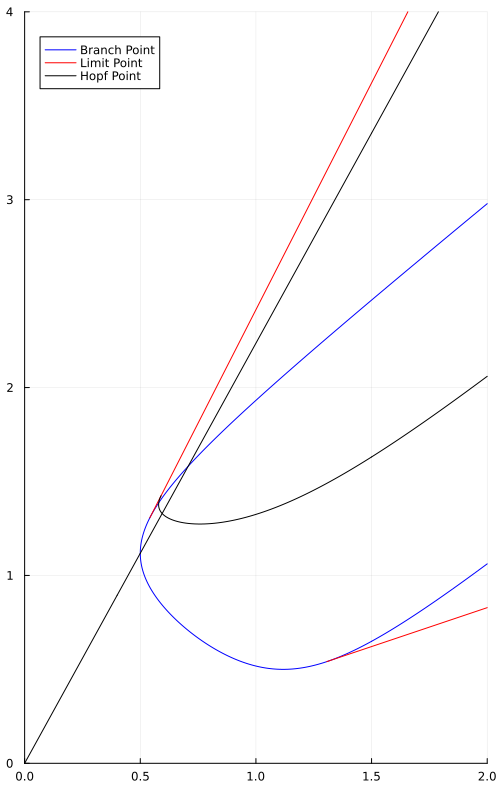

In [53]:
plot(bpb1[:, end], bpb1[:, end-1], color = "blue", label = "Branch Point", size = (500, 800))
plot!(bpb2[:, end], bpb2[:, end-1], color = "blue", label = "")
plot!(lpb1[:, end], lpb1[:, end-1], color = "red", label = "Limit Point")
plot!(lpb2[:, end], lpb2[:, end-1], color = "red", label = "")
plot!(hpb11[:, end], hpb11[:, end-1], color = "black", label = "Hopf Point")
plot!(hpb21[:, end], hpb21[:, end-1], color = "black", label = "")
plot!(hpb12[:, end], hpb12[:, end-1], color = "black", label = "")
plot!(hpb22[:, end], hpb22[:, end-1], color = "black", label = "")
plot!(hpb31[:, end], hpb31[:, end-1], color = "black", label = "")
plot!(hpb32[:, end], hpb32[:, end-1], color = "black", label = "")
ylims!(0.0, 4.0)
xlims!(0.0, 2.0)

In [34]:
gr()  # o `pyplot()` o cualquier backend
set_variables("δx", numvars = 4, order = 1)

# Malla de valores para dos parámetros
x_vals = range(0.0, 2.0, length=10)
y_vals = range(0.0, 4.0, length=10)

# Matriz para guardar el MLE en cada punto
lyapunov_map = zeros(length(y_vals), length(x_vals))

# Bucle doble sobre malla
for (i, y0) in enumerate(y_vals)
    for (j, x0) in enumerate(x_vals)
        # Condición inicial o parámetros para lyap_taylorinteg
        params_temp = [params1 ; x0 ; y0]
        x0 = rand(4)
        sol = lyap_taylorinteg(OpenDicke!, x0, 0.0, 1000.0, 20, 1.e-20, params_temp)
        lyapunov_map[i, j] = sol.λ[end]
    end
end

┌ Warning: Maximum number of integration steps reached; exiting.
└ @ TaylorIntegration C:\Users\leoml\.julia\dev\TaylorIntegration\src\lyapunovspectrum.jl:353
┌ Warning: Maximum number of integration steps reached; exiting.
└ @ TaylorIntegration C:\Users\leoml\.julia\dev\TaylorIntegration\src\lyapunovspectrum.jl:353
┌ Warning: Maximum number of integration steps reached; exiting.
└ @ TaylorIntegration C:\Users\leoml\.julia\dev\TaylorIntegration\src\lyapunovspectrum.jl:353
┌ Warning: Maximum number of integration steps reached; exiting.
└ @ TaylorIntegration C:\Users\leoml\.julia\dev\TaylorIntegration\src\lyapunovspectrum.jl:353
┌ Warning: Maximum number of integration steps reached; exiting.
└ @ TaylorIntegration C:\Users\leoml\.julia\dev\TaylorIntegration\src\lyapunovspectrum.jl:353
┌ Warning: Maximum number of integration steps reached; exiting.
└ @ TaylorIntegration C:\Users\leoml\.julia\dev\TaylorIntegration\src\lyapunovspectrum.jl:353
┌ Warning: Maximum number of integration steps

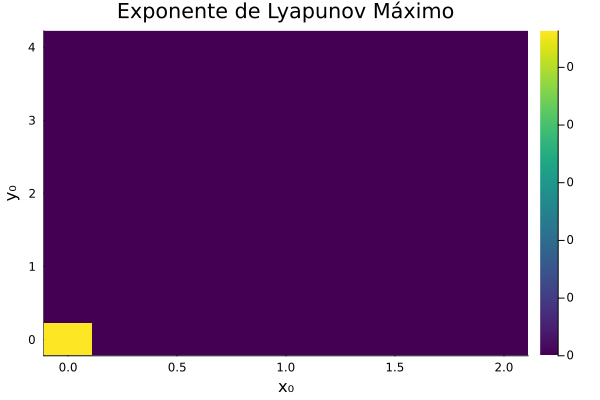

In [35]:
# Heatmap
heatmap(x_vals, y_vals, lyapunov_map',
    xlabel="x₀", ylabel="y₀", title="Exponente de Lyapunov Máximo",
    color=:viridis, clims=(0, maximum(lyapunov_map)))

In [ ]:
using Random, Statistics

gr()  # backend de Plots

x_vals = range(0.0, 2.0, length=100)
y_vals = range(0.0, 4.0, length=100)
lyapunov_map = zeros(length(y_vals), length(x_vals))

N = 10  # Número de muestras de Monte Carlo

# Rango o distribución para condiciones iniciales aleatorias (ajústalo a tu sistema)
function random_initial_condition()
    return randn(n)  # o por ejemplo: rand(Uniform(-1, 1), n)
end

for (i, ypar) in enumerate(y_vals)
    for (j, xpar) in enumerate(x_vals)
        params_temp = [params1 ; xpar ; ypar]

        mles = Float64[]  # Exponentes en este punto

        for _ in 1:N
            x0 = random_initial_condition()
            sol = lyap_taylorinteg(f!, x0, 0.0, 1000, 20, 1.e-20, params_temp; maxsteps = 1000)
            mle = maximum(sol)  # o ajusta según tu output
            push!(mles, mle)
        end

        lyapunov_map[i, j] = mean(mles)
    end
end

# Graficar
heatmap(x_vals, y_vals, lyapunov_map',
    xlabel="x parámetro", ylabel="y parámetro", title="Mapa MLE promedio (Monte Carlo)",
    color=:viridis, clims=(0, maximum(lyapunov_map)))

In [93]:
include("functions_dicke.jl");

In [272]:
include("../src/NumDiffEq.jl");

In [273]:
paramsP = [1.0, 1.0, 1.0, params[4]]
integorder = 20
integtol = 1.e-20
integmaxsteps = 10000
maxsteps = 60
tol = 1.e-8
Δs = 0.1
ite = 20;

In [233]:
x_ini = [eqb2.h[4, :] ; 2*π / abs(imag(eqb2.heval[4, 4]))]
λ_ini = eqb2.heval[4, 4]
v_ini = eqb2.hevec[4, :, 4]

4-element Vector{ComplexF64}:
 0.0006746264205786568 + 0.00015817455276674706im
  0.023068183320469407 + 0.005408622414646641im
 -6.820689168478416e-5 - 0.7068393751113367im
    0.7069768162548947 + 0.0im

In [65]:
@time xop = OrbitContinuation(OpenDickeP!, x_ini, λ_ini, v_ini, paramsP, Δs, maxsteps, tol, 
                              ite, integorder, integtol, integmaxsteps);

 i = 100 : norm = 7.845300415935284e-13 	 27.413483 seconds (120.60 M allocations: 5.698 GiB, 6.03% gc time)


In [72]:
@time xop = OrbitContinuation(OpenDickeP!, x_ini, λ_ini, v_ini, paramsP, Δs, maxsteps, tol, 
                              ite, integorder, integtol, integmaxsteps);

 i = 100 : norm = 7.845300415935284e-13 	 18.089687 seconds (74.09 M allocations: 2.991 GiB, 4.92% gc time)


In [275]:
@time xop, PDtest, LPCtest, freal, fimag = OrbitContinuation(OpenDickeP!, x_ini, λ_ini, v_ini, paramsP, Δs, maxsteps, tol, 
                              ite, integorder, integtol, integmaxsteps);

 Progreso: 100.0 % 	 43.198791 seconds (152.66 M allocations: 6.127 GiB, 6.29% gc time, 0.11% compilation time)


[ Info: Saved animation to C:\Users\leoml\Tesis\notebooks\tmp.gif


Plots.AnimatedGif("C:\\Users\\leoml\\Tesis\\notebooks\\tmp.gif")
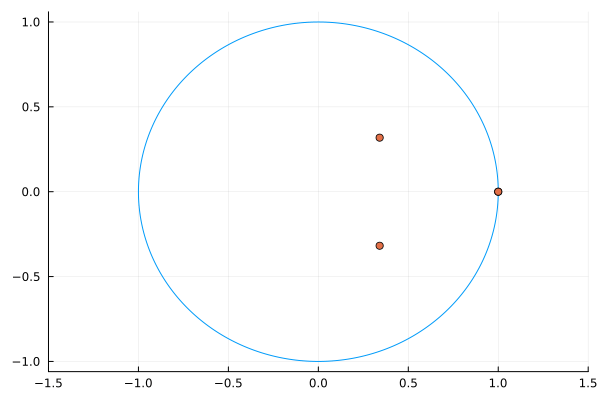

In [282]:

@gif for i in 1:size(freal, 1)
    plot([(sin(θ), cos(θ)) for θ in 0.0:0.01:2π], leg = false, xlims = (-1.5, 1.5))
    scatter!(freal[i, :], fimag[i, :])
end


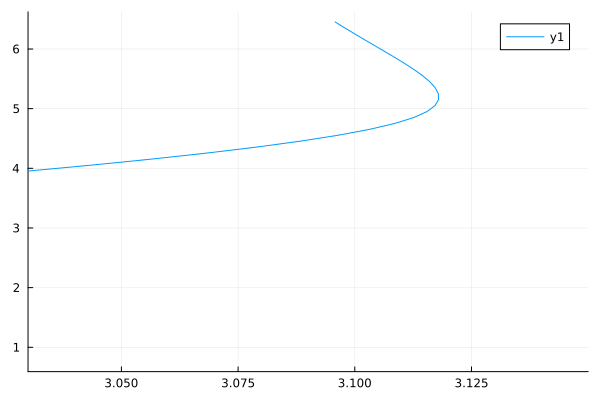

In [266]:
plot(xop[:, end-1], xop[:, end], xlims = (3.03, 3.15))

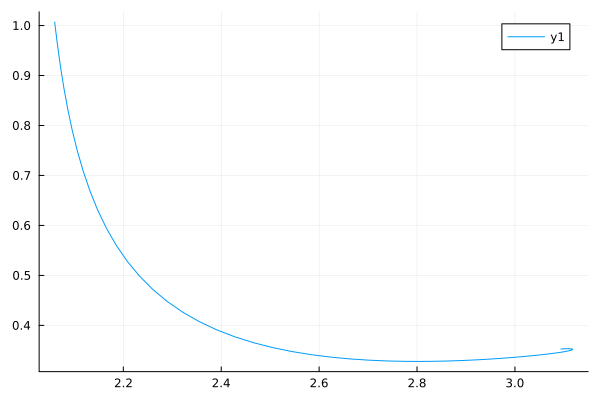

In [270]:
plot(xop[:, end-1], xop[:, 1])

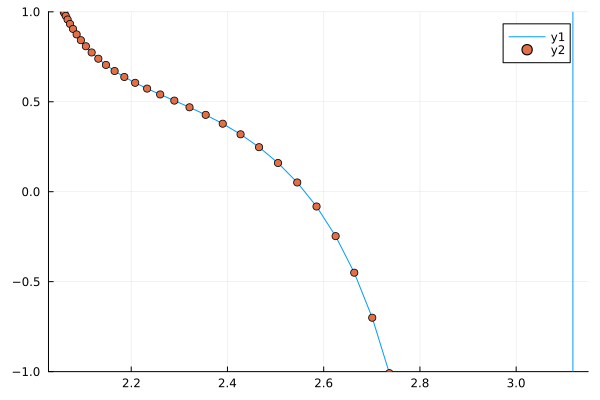

In [271]:
plot(xop[:, end-1], PDtest ./ PDtest[1], ylims = (-1.0, 1.0))
scatter!(xop[:, end-1], PDtest ./ PDtest[1])
# plot!(xop[2:end, end-1], LPCtest[2:end])#, ylims = (-0.001, 0.001))

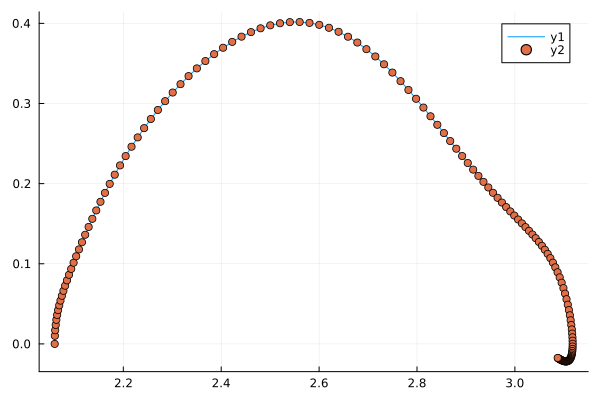

In [251]:
plot(xop[:, end-1], LPCtest)#, ylims = (-1.0, 1.0))
scatter!(xop[:, end-1], LPCtest)
# plot!(xop[2:end, end-1], LPCtest[2:end])#, ylims = (-0.001, 0.001))

In [247]:
LPCtest[1]

0.0

### Optimización

Con un paso de `Δs = 0.01` y con 100 pasos:

- Sin modificar `taylorinteg` : ` 27.413483 seconds (120.60 M allocations: 5.698 GiB, 6.03% gc time) `
- Sin almacenar información : ` 18.089687 seconds (74.09 M allocations: 2.991 GiB, 4.92% gc time) `
- Con una sola inicialización : ` 20.289177 seconds (72.66 M allocations: 2.930 GiB, 3.36% gc time) `

Con un paso de `Δs = 0.01` y con 758 pasos:
- Sin modificar `taylorinteg` : `624.249446 seconds (2.77 G allocations: 122.740 GiB, 5.30% gc time)`
- Con una sola inicialización : `478.182809 seconds (1.62 G allocations: 65.079 GiB, 3.11% gc time)`

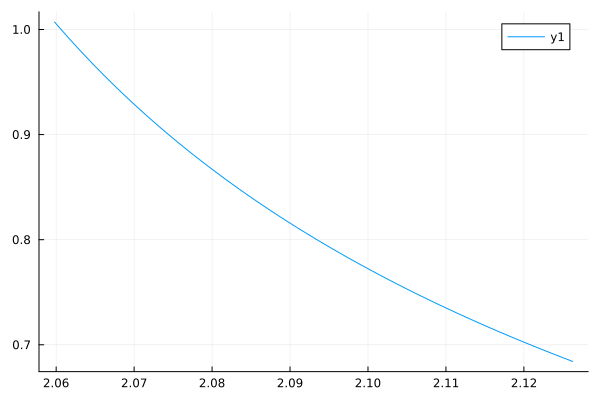

In [83]:
plot(xop[:, end-1], xop[:, 1])

In [834]:
params = [ω, ω₀, κ, λ₋];

In [881]:
ξ_ini = [real(α0), imag(α0), x(β0, γ0), y(β0, γ0), λ₊, 500.0]

6-element Vector{Float64}:
   0.001
   0.0
  10.000000000001101
   0.0
   1.0
 500.0

In [900]:
δx = set_variables("δx", numvars = 6, order = 1)

6-element Vector{TaylorN{Float64}}:
  1.0 δx₁ + 𝒪(‖x‖²)
  1.0 δx₂ + 𝒪(‖x‖²)
  1.0 δx₃ + 𝒪(‖x‖²)
  1.0 δx₄ + 𝒪(‖x‖²)
  1.0 δx₅ + 𝒪(‖x‖²)
  1.0 δx₆ + 𝒪(‖x‖²)

In [889]:
A = zeros(6, 6)

6×6 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0

In [897]:
@time begin
sol = taylorinteg(f!, ξ_ini + δx, 0.0, 500.0, 30, 1.e-25, params; maxsteps = 10000)
A .= TaylorSeries.jacobian(sol.x[end, :])
end

  9.455374 seconds (12.27 M allocations: 675.079 MiB, 3.49% gc time)


6×6 Matrix{Float64}:
 -1.67826e-20  4.22364e-20  1.71828e-21  -7.66735e-22  -0.360844  0.0
 -1.90252e-20  6.94083e-20  2.71721e-21  -1.13913e-21  -0.360844  0.0
 -4.5138e-20   6.14249e-20  2.75699e-21  -1.408e-21     0.3849    0.0
 -9.05076e-20  2.64973e-19  1.05958e-20  -4.60134e-21  -0.288675  0.0
  0.0          0.0          0.0           0.0           1.0       0.0
  0.0          0.0          0.0           0.0           0.0       1.0

In [902]:
@time begin
sol = taylorinteg(PO!, ξ_ini + δx, 0.0, 1.0, 30, 1.e-25, params; maxsteps = 10000)
A .= TaylorSeries.jacobian(sol.x[end, :])
end

  2.451096 seconds (7.79 M allocations: 366.707 MiB, 8.81% gc time)


6×6 Matrix{Float64}:
 -1.67826e-20  4.22364e-20  1.71828e-21  …  -0.360844  -7.34036e-22
 -1.90252e-20  6.94083e-20  2.71721e-21     -0.360844  -2.04964e-21
 -4.5138e-20   6.14249e-20  2.75699e-21      0.3849     9.76388e-22
 -9.05076e-20  2.64973e-19  1.05958e-20     -0.288675  -6.06213e-21
  0.0          0.0          0.0              1.0        0.0
  0.0          0.0          0.0          …   0.0        1.0

In [862]:
@time begin

    for j in 1:5
        sol .= taylorinteg(f!, ξ_ini + t[:, j], 0.0, 10.0, 30, 1.e-25, params; maxsteps = 10000).x[end, :]
        for i in 1:5
            A[i, j] = evaluate(differentiate(sol[i]))
        end
    end
A

end

LoadError: MethodError: no method matching ndims(::Type{TaylorSolution{Float64, TaylorN{Float64}, 2, SubArray{Float64, 1, Vector{Float64}, Tuple{UnitRange{Int64}}, true}, SubArray{TaylorN{Float64}, 2, Transpose{TaylorN{Float64}, SubArray{TaylorN{Float64}, 2, Matrix{TaylorN{Float64}}, Tuple{Base.Slice{Base.OneTo{Int64}}, UnitRange{Int64}}, true}}, Tuple{UnitRange{Int64}, Base.Slice{Base.OneTo{Int64}}}, false}, SubArray{Taylor1{TaylorN{Float64}}, 2, Transpose{Taylor1{TaylorN{Float64}}, SubArray{Taylor1{TaylorN{Float64}}, 2, Matrix{Taylor1{TaylorN{Float64}}}, Tuple{Base.Slice{Base.OneTo{Int64}}, UnitRange{Int64}}, true}}, Tuple{UnitRange{Int64}, Base.Slice{Base.OneTo{Int64}}}, false}, Nothing, Nothing, Nothing}})
The function `ndims` exists, but no method is defined for this combination of argument types.

[0mClosest candidates are:
[0m  ndims([91m::Type{Union{}}[39m, Any...)
[0m[90m   @[39m [90mBase[39m [90m[4mabstractarray.jl:276[24m[39m
[0m  ndims([91m::Type{<:Ref}[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mrefpointer.jl:102[24m[39m
[0m  ndims([91m::Type{<:Number}[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:86[24m[39m
[0m  ...


In [767]:
@time sol = taylorinteg(PO!, ξ_ini + δx, 0.0, 1.0, 30, 1.e-25, params; maxsteps = 10000, parse_eqs = false)

 23.157118 seconds (127.01 M allocations: 6.664 GiB, 14.60% gc time)


tspan: (0.0, 1.0), x: 6 TaylorN{Float64} variables

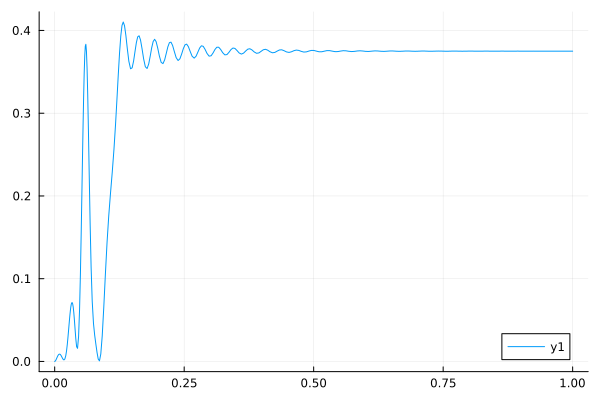

In [698]:
plot(sol.t, sol.x[:, 1] .^ 2 + sol.x[:, 2] .^ 2)

In [82]:
A = [rand(3) for i in 1:3]
B = [rand(3) for i in 1:3]

3-element Vector{Vector{Float64}}:
 [0.3788410544528621, 0.7314183663688854, 0.8841349625436554]
 [0.6964525376216505, 0.6660515884007785, 0.08955340502995746]
 [0.9994782746514832, 0.1645452048252889, 0.5562852751115052]

In [83]:
@. A = $B

3-element Vector{Vector{Float64}}:
 [0.3788410544528621, 0.7314183663688854, 0.8841349625436554]
 [0.6964525376216505, 0.6660515884007785, 0.08955340502995746]
 [0.9994782746514832, 0.1645452048252889, 0.5562852751115052]

In [86]:
? TaylorSeries.jacobian!

!!! warning
    The following bindings may be internal; they may change or be removed in future versions:

      * `TaylorSeries.jacobian!`


```
    jacobian!(jac, vf)
    jacobian!(jac, vf, [vals])
```

Compute the jacobian matrix of `vf`, a vector of `TaylorN` polynomials evaluated at the vector `vals`, and write results to `jac`. If `vals` is omitted, it is evaluated at zero.


In [193]:
A = rand(4, 4)

4×4 Matrix{Float64}:
 0.672374  0.30152   0.0261319  0.695397
 0.417713  0.869632  0.884747   0.939139
 0.667363  0.383019  0.418527   0.380824
 0.377076  0.343394  0.112607   0.0763523

In [198]:
for i in eachindex(A)
    println(i)
end

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


In [386]:
function BiProduct(A::AbstractMatrix{U}, B::AbstractMatrix{U}) where U<:Number
    # Esta función calcula el producto bialternante entre las matrices A y B.
    @assert size(A) == size(B) "A and B must have the same dimensions."
    @assert size(A, 1) == size(A, 2) "A is not a square matrix."
    @assert size(B, 1) == size(B, 2) "B is not a square matrix."

    n = size(A, 1)  # Número de filas (y columnas, ya que A es cuadrada)
    m = (n * (n - 1)) ÷ 2  # Número de elementos en la parte triangular

    # Inicializar la matriz C
    C = Array{U, 2}(undef, m, m)

    ii = 1
    for i in 2:n
        for j in 1:i-1
            kk = 1
            for k in 2:n
                for l in 1:k-1
                    @inbounds C[ii, kk] = 0.5 * (
                        A[i, k] * B[j, l] - B[j, k] * A[i, l] +
                        B[i, k] * A[j, l] - A[j, k] * B[i, l]
                    )
                    kk += 1
                end
            end
            ii += 1
        end
    end

    return C
end


function BiProduct(A::AbstractMatrix{U}, B::AbstractMatrix{T}) where {U<:Number,T<:Number}

    if U<:T
        A_ = T.(A)
        return BiProduct(A_, B)
    else
        B_ = U.(B)
        return BiProduct(A, B_)
    end

end

function BiProduct(A::AbstractMatrix{U}) where U<:Number
    # Esta función calcula el producto bialternante entre las matrices A y B.
    @assert size(A, 1) == size(A, 2) "A is not a square matrix."

    n = size(A, 1)  # Número de filas (y columnas, ya que A es cuadrada)
    m = (n * (n - 1)) ÷ 2  # Número de elementos en la parte triangular

    # Inicializar la matriz C
    C = Array{U, 2}(undef, m, m)

    ii = 1
    for i in 2:n
        for j in 1:i-1
            kk = 1
            for k in 2:n
                for l in 1:k-1
                    @inbounds C[ii, kk] = A[i, k] * A[j, l] - A[j, k] * A[i, l]
                    kk += 1
                end
            end
            ii += 1
        end
    end

    return C
end


function BiProduct(A::AbstractMatrix{U}, I::UniformScaling{Bool}) where U<:Number
    
    @assert size(A, 1) == size(A, 2) "A is not a square matrix."

    n = size(A, 1)  # Número de filas (y columnas, ya que A es cuadrada)
    m = (n * (n - 1)) ÷ 2  # Número de elementos en la parte triangular

    # Inicializar la matriz C
    C = Array{U, 2}(undef, m, m)

    ii = 1
    for i in 2:n
        for j in 1:i-1
            kk = 1
            for k in 2:n
                for l in 1:k-1
                    @inbounds C[ii, kk] = 0.5 * (
                        A[i, k] * I[j, l] - I[j, k] * A[i, l] +
                        I[i, k] * A[j, l] - A[j, k] * I[i, l]
                    )
                    kk += 1
                end
            end
            ii += 1
        end
    end

    return C
end


function BiProduct(a::U, A::AbstractMatrix{U}, I::UniformScaling{Bool}) where U<:Number
    
    @assert size(A, 1) == size(A, 2) "A is not a square matrix."

    n = size(A, 1)  # Número de filas (y columnas, ya que A es cuadrada)
    m = (n * (n - 1)) ÷ 2  # Número de elementos en la parte triangular

    # Inicializar la matriz C
    C = Array{U, 2}(undef, m, m)

    ii = 1
    for i in 2:n
        for j in 1:i-1
            kk = 1
            for k in 2:n
                for l in 1:k-1
                    @inbounds C[ii, kk] = a * 0.5 * (
                        A[i, k] * I[j, l] - I[j, k] * A[i, l] +
                        I[i, k] * A[j, l] - A[j, k] * I[i, l]
                    )
                    kk += 1
                end
            end
            ii += 1
        end
    end

    return C
end

function BiProduct(a::T, A::AbstractMatrix{U}, I::UniformScaling{Bool}) where {U<:Number,T<:Number}

    if U<:T
        A_ = T.(A)
        return BiProduct(a, A_, I)
    else
        a_ = U(a)
        return BiProduct(a_, A, I)
    end

end

BiProduct (generic function with 7 methods)

In [367]:
A = rand(3, 3)

3×3 Matrix{Float64}:
 0.0713311  0.705531  0.516525
 0.376299   0.252988  0.635654
 0.566876   0.850586  0.280928

In [391]:
@time C = BiProduct(2.0, A, I)

  0.000013 seconds (2 allocations: 144 bytes)


3×3 Matrix{Float64}:
  0.32432   0.635654  -0.516525
  0.850586  0.352259   0.705531
 -0.566876  0.376299   0.533916

In [369]:
abs(det(C) - det(A)^2)

1.3877787807814457e-17

In [370]:
? I

search: I IO In



```
I
```

An object of type [`UniformScaling`](@ref), representing an identity matrix of any size.

# Examples

```jldoctest
julia> fill(1, (5,6)) * I == fill(1, (5,6))
true

julia> [1 2im 3; 1im 2 3] * I
2×3 Matrix{Complex{Int64}}:
 1+0im  0+2im  3+0im
 0+1im  2+0im  3+0im
```


In [376]:
typeof(I)

UniformScaling{Bool}

In [392]:
? set_variables

search: set_variables get_variables get_variable_names get_variable_symbols



```
set_variables([T::Type], names::String; [order=get_order(), numvars=-1])
```

Return a `TaylorN{T}` vector with each entry representing an independent variable. `names` defines the output for each variable (separated by a space). The default type `T` is `Float64`, and the default for `order` is the one defined globally. Changing the `order` or `numvars` resets the hash_tables.

If `numvars` is not specified, it is inferred from `names`. If only one variable name is defined and `numvars>1`, it uses this name with subscripts for the different variables.

```julia
julia> set_variables(Int, "x y z", order=4)
3-element Array{TaylorSeries.TaylorN{Int},1}:
  1 x + 𝒪(‖x‖⁵)
  1 y + 𝒪(‖x‖⁵)
  1 z + 𝒪(‖x‖⁵)

julia> set_variables("α", numvars=2)
2-element Array{TaylorSeries.TaylorN{Float64},1}:
  1.0 α₁ + 𝒪(‖x‖⁵)
  1.0 α₂ + 𝒪(‖x‖⁵)

julia> set_variables("x", order=6, numvars=2)
2-element Array{TaylorSeries.TaylorN{Float64},1}:
  1.0 x₁ + 𝒪(‖x‖⁷)
  1.0 x₂ + 𝒪(‖x‖⁷)
```


In [398]:
? TaylorSeries.evaluate!

```
evaluate!(x, δt, x0)
```

Evaluates each element of `x::AbstractArray{Taylor1{T}}`, representing the Taylor expansion for the dependent variables of an ODE at *time* `δt`. It updates the vector `x0` with the computed values.


In [399]:
? det!

search: get! det ldlt! delete! Set dot get put! density! Meta detach let

Couldn't find det!
Perhaps you meant det, get!, ldlt!, let, Meta, put!, get, dot, Set or delete!


No documentation found.

Binding `det!` does not exist.


In [400]:
?det

search: det Set dot get let IdSet get! ldlt Meta detach Text text edit logdet



```
det(M)
```

Matrix determinant.

See also: [`logdet`](@ref) and [`logabsdet`](@ref).

# Examples

```jldoctest
julia> M = [1 0; 2 2]
2×2 Matrix{Int64}:
 1  0
 2  2

julia> det(M)
2.0
```


In [401]:
? logdet

search: logdet logabsdet ldlt log10 get log2 log1p let log det



```
logdet(M)
```

Logarithm of matrix determinant. Equivalent to `log(det(M))`, but may provide increased accuracy and avoids overflow/underflow.

# Examples

```jldoctest
julia> M = [1 0; 2 2]
2×2 Matrix{Int64}:
 1  0
 2  2

julia> logdet(M)
0.6931471805599453

julia> logdet(Matrix(I, 3, 3))
0.0
```


In [104]:
A = rand(5,5)

5×5 Matrix{Float64}:
 0.41639   0.0287047  0.256177  0.4245    0.248739
 0.376622  0.316214   0.872149  0.767637  0.575156
 0.337255  0.950938   0.346968  0.663793  0.361856
 0.640721  0.0216968  0.798606  0.476046  0.237586
 0.212144  0.959136   0.185076  0.269762  0.372863

In [109]:
B = @view A[2:3, 4]

2-element view(::Matrix{Float64}, 2:3, 4) with eltype Float64:
 0.7676374502318436
 0.6637931854995149

In [110]:
typeof(B)

SubArray{Float64, 1, Matrix{Float64}, Tuple{UnitRange{Int64}, Int64}, true}

In [111]:
B .= @view A[3:4, 1]

2-element view(::Matrix{Float64}, 2:3, 4) with eltype Float64:
 0.33725531061449554
 0.6407207694421861

In [149]:
eigen(A)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
5-element Vector{Float64}:
 -0.779061921244075
 -0.16512581412337904
  0.15460241367324834
  0.5486536488836502
  2.1694129974125267
vectors:
5×5 Matrix{Float64}:
  0.0612237  -0.548496   0.553287   -0.439379  -0.25208
  0.546835   -0.296955  -0.0528144   0.344007  -0.520448
 -0.558441   -0.158592  -0.451488    0.116175  -0.551606
  0.403863    0.563936  -0.400265   -0.574482  -0.422219
 -0.471446    0.517489   0.571866    0.587434  -0.427845

In [150]:
? Eigen

search: Eigen eigen eigen! sign widen signed BigInt Signed eigmin givens



```
Eigen <: Factorization
```

Matrix factorization type of the eigenvalue/spectral decomposition of a square matrix `A`. This is the return type of [`eigen`](@ref), the corresponding matrix factorization function.

If `F::Eigen` is the factorization object, the eigenvalues can be obtained via `F.values` and the eigenvectors as the columns of the matrix `F.vectors`. (The `k`th eigenvector can be obtained from the slice `F.vectors[:, k]`.)

Iterating the decomposition produces the components `F.values` and `F.vectors`.

# Examples

```jldoctest
julia> F = eigen([1.0 0.0 0.0; 0.0 3.0 0.0; 0.0 0.0 18.0])
Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
3-element Vector{Float64}:
  1.0
  3.0
 18.0
vectors:
3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

julia> F.values
3-element Vector{Float64}:
  1.0
  3.0
 18.0

julia> F.vectors
3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

julia> vals, vecs = F; # destructuring via iteration

julia> vals == F.values && vecs == F.vectors
true
```


In [157]:
Ev = Eigen(Array{Complex{Float64}, 1}(undef, 5), 
           Array{Complex{Float64}, 2}(undef, 5, 5))

Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
5-element Vector{ComplexF64}:
  6.9529414018375e-310 + 6.9529422057005e-310im
  6.9530757041787e-310 + 1.289881811604e-311im
  6.9530757041771e-310 + 3.1560874504533e-310im
 6.95307570027516e-310 + 6.9530757013447e-310im
 6.95294169949505e-310 + 6.9530757041755e-310im
vectors:
5×5 Matrix{ComplexF64}:
 1.28999e-311+1.28999e-311im  …  1.28999e-311+1.28999e-311im
 1.28999e-311+1.28999e-311im     1.28999e-311+1.28999e-311im
 1.28999e-311+1.28999e-311im     1.28999e-311+1.28999e-311im
 1.28999e-311+1.28999e-311im     1.28999e-311+1.28999e-311im
 1.28999e-311+1.28999e-311im     1.28999e-311+1.28999e-311im

In [158]:
Ev .= eigen(A)

LoadError: MethodError: no method matching length(::Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}})
The function `length` exists, but no method is defined for this combination of argument types.
You may need to implement the `length` method or define `IteratorSize` for this type to be `SizeUnknown`.

[0mClosest candidates are:
[0m  length([91m::Plots.PlotText[39m)
[0m[90m   @[39m [32mPlots[39m [90mC:\Users\leoml\.julia\packages\Plots\Ec1L1\src\[39m[90m[4mcomponents.jl:378[24m[39m
[0m  length([91m::ExponentialBackOff[39m)
[0m[90m   @[39m [90mBase[39m [90m[4merror.jl:271[24m[39m
[0m  length([91m::CompositeException[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mtask.jl:51[24m[39m
[0m  ...


In [101]:
? ldiv! 

search: ldiv! rdiv! ldlt! div



```
ldiv!(Y, A, B) -> Y
```

Compute `A \ B` in-place and store the result in `Y`, returning the result.

The argument `A` should *not* be a matrix.  Rather, instead of matrices it should be a factorization object (e.g. produced by [`factorize`](@ref) or [`cholesky`](@ref)). The reason for this is that factorization itself is both expensive and typically allocates memory (although it can also be done in-place via, e.g., [`lu!`](@ref)), and performance-critical situations requiring `ldiv!` usually also require fine-grained control over the factorization of `A`.

!!! note
    Certain structured matrix types, such as `Diagonal` and `UpperTriangular`, are permitted, as these are already in a factorized form


# Examples

```jldoctest
julia> A = [1 2.2 4; 3.1 0.2 3; 4 1 2];

julia> X = [1; 2.5; 3];

julia> Y = zero(X);

julia> ldiv!(Y, qr(A), X);

julia> Y ≈ A\X
true
```

---

```
ldiv!(A, B)
```

Compute `A \ B` in-place and overwriting `B` to store the result.

The argument `A` should *not* be a matrix.  Rather, instead of matrices it should be a factorization object (e.g. produced by [`factorize`](@ref) or [`cholesky`](@ref)). The reason for this is that factorization itself is both expensive and typically allocates memory (although it can also be done in-place via, e.g., [`lu!`](@ref)), and performance-critical situations requiring `ldiv!` usually also require fine-grained control over the factorization of `A`.

!!! note
    Certain structured matrix types, such as `Diagonal` and `UpperTriangular`, are permitted, as these are already in a factorized form


# Examples

```jldoctest
julia> A = [1 2.2 4; 3.1 0.2 3; 4 1 2];

julia> X = [1; 2.5; 3];

julia> Y = copy(X);

julia> ldiv!(qr(A), X);

julia> X ≈ A\Y
true
```

---

```
ldiv!(a::Number, B::AbstractArray)
```

Divide each entry in an array `B` by a scalar `a` overwriting `B` in-place.  Use [`rdiv!`](@ref) to divide scalar from right.

# Examples

```jldoctest
julia> B = [1.0 2.0; 3.0 4.0]
2×2 Matrix{Float64}:
 1.0  2.0
 3.0  4.0

julia> ldiv!(2.0, B)
2×2 Matrix{Float64}:
 0.5  1.0
 1.5  2.0
```

---

```
ldiv!(A::Tridiagonal, B::AbstractVecOrMat) -> B
```

Compute `A \ B` in-place by Gaussian elimination with partial pivoting and store the result in `B`, returning the result. In the process, the diagonals of `A` are overwritten as well.

!!! compat "Julia 1.11"
    `ldiv!` for `Tridiagonal` left-hand sides requires at least Julia 1.11.



In [172]:
? set_variables

search: set_variables get_variables get_variable_names get_variable_symbols



```
set_variables([T::Type], names::String; [order=get_order(), numvars=-1])
```

Return a `TaylorN{T}` vector with each entry representing an independent variable. `names` defines the output for each variable (separated by a space). The default type `T` is `Float64`, and the default for `order` is the one defined globally. Changing the `order` or `numvars` resets the hash_tables.

If `numvars` is not specified, it is inferred from `names`. If only one variable name is defined and `numvars>1`, it uses this name with subscripts for the different variables.

```julia
julia> set_variables(Int, "x y z", order=4)
3-element Array{TaylorSeries.TaylorN{Int},1}:
  1 x + 𝒪(‖x‖⁵)
  1 y + 𝒪(‖x‖⁵)
  1 z + 𝒪(‖x‖⁵)

julia> set_variables("α", numvars=2)
2-element Array{TaylorSeries.TaylorN{Float64},1}:
  1.0 α₁ + 𝒪(‖x‖⁵)
  1.0 α₂ + 𝒪(‖x‖⁵)

julia> set_variables("x", order=6, numvars=2)
2-element Array{TaylorSeries.TaylorN{Float64},1}:
  1.0 x₁ + 𝒪(‖x‖⁷)
  1.0 x₂ + 𝒪(‖x‖⁷)
```
